In [ ]:
# ติดตั้งไลบรารีที่จำเป็น
# !pip install tensorflow keras numpy pandas pillow

import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, HTML, Javascript
from PIL import Image
import io

# ตั้งค่าตำแหน่งโฟลเดอร์
MODEL_PATH = "/content/drive/MyDrive/Colab Notebooks/rice-disease-dignosis/model/best_model_v5.h5"
CSV_PATH = "/content/drive/MyDrive/Colab Notebooks/rice-disease-dignosis/disease_info.csv"

# โหลดโมเดล EfficientNet ที่ฝึกไว้
model = load_model(MODEL_PATH)
print("✅ โมเดลโหลดสำเร็จ!")

# โหลดข้อมูลคำแนะนำ
disease_info = pd.read_csv(CSV_PATH)
print("✅ โหลดข้อมูลคำแนะนำสำเร็จ!")

# ชื่อคลาสของโรคที่โมเดลสามารถวิเคราะห์ได้
class_names = ["Bacterial leaf blight", "Blast", "Brown spot", "Sheath blight"]

# ฟังก์ชันพยากรณ์โรคจากภาพ
def predict_disease(image):
    img = image.resize((224, 224))  # Resize ให้ตรงกับ input ของ EfficientNet
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # เพิ่ม batch dimension
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction) * 100
    return predicted_class, confidence

# Widget อัปโหลดภาพ
upload = widgets.FileUpload(accept='image/*', multiple=False)

# Dropdown เลือกคำแนะนำ
categories = ["Cause", "Symptom", "Prevention", "Control", "Recovery", "Solution"]
checkboxes = [widgets.Checkbox(value=False, description=cat) for cat in categories]

# แสดงผลลัพธ์
output = widgets.Output()

# ฟังก์ชันแสดงผลการวิเคราะห์
def display_results(change):
    output.clear_output()
    uploaded_file = upload.value
    if not uploaded_file:
        return

    # อ่านภาพ
    image_data = list(uploaded_file.values())[0]['content']
    image = Image.open(io.BytesIO(image_data))

    # พยากรณ์โรค
    disease, confidence = predict_disease(image)

    # แสดงผลการวิเคราะห์
    with output:
        display(image)  # แสดงภาพที่อัปโหลด
        display(HTML(f"<h3>🔍 ผลการวิเคราะห์: <span style='color:blue;'>{disease}</span> (ความแม่นยำ {confidence:.2f}%)</h3>"))

        # แสดงคำแนะนำ
        for cb in checkboxes:
            if cb.value:
                advice = disease_info[(disease_info["disease"] == disease) & (disease_info["category"] == cb.description)]["advice"].values
                if len(advice) > 0:
                    display(HTML(f"<b>{cb.description}:</b> {advice[0]}"))
                else:
                    display(HTML(f"<b>{cb.description}:</b> ไม่มีข้อมูล"))

        # ปุ่มค้นหาข้อมูลเพิ่มเติม
        query = f"{disease} rice disease management"
        search_button = widgets.Button(description="🌐 ค้นหาข้อมูลเพิ่มเติม")
        search_button.on_click(lambda b: display(Javascript(f'window.open("https://www.google.com/search?q={query}", "_blank")')))
        display(search_button)

# ปุ่มแสดงผล
show_button = widgets.Button(description="🔎 วิเคราะห์ภาพ")
show_button.on_click(display_results)

# Layout ของ UI
ui = widgets.VBox([upload] + checkboxes + [show_button, output])
display(ui)


TypeError: Error when deserializing class 'InputLayer' using config={'batch_shape': [None, 224, 224, 3], 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_1'}.

Exception encountered: Unrecognized keyword arguments: ['batch_shape']

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

MODEL_PATH = "/content/drive/MyDrive/Colab Notebooks/rice-disease-dignosis/model/best_model_v5.h5"

try:
    model = load_model(MODEL_PATH, compile=False)  # ปิด compile
    print("✅ โมเดลโหลดสำเร็จ!")
except Exception as e:
    print(f"❌ ไม่สามารถโหลดโมเดล: {e}")

❌ ไม่สามารถโหลดโมเดล: Error when deserializing class 'InputLayer' using config={'batch_shape': [None, 224, 224, 3], 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_1'}.

Exception encountered: Unrecognized keyword arguments: ['batch_shape']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#ติดตั้ง Dependencies

In [ ]:
# !pip install ipywidgets fpdf pandas pillow matplotlib

# กำหนด Paths และ Global Variables

In [ ]:
import os

BASE_DIR = os.getcwd()
MODEL_DIR = os.path.join(BASE_DIR, "model")
CLASSIFICATION_MODEL_PATH = os.path.join(MODEL_DIR, "/content/drive/MyDrive/Colab Notebooks/rice-disease-dignosis/model/best_model_v5.h5")
FILTER_MODEL_PATH = os.path.join(MODEL_DIR, "/content/drive/MyDrive/Colab Notebooks/rice-disease-dignosis/model/filter_model.h5")
CSV_PATH = os.path.join(BASE_DIR, "/content/drive/MyDrive/Colab Notebooks/rice-disease-dignosis/disease_info.csv")
UPLOADED_IMAGE_PATH = "uploaded_image.png"  # ชื่อไฟล์ภาพที่อัปโหลด

# ฟังก์ชันที่เกี่ยวกับ Model

In [ ]:
import tensorflow as tf
from PIL import Image
import numpy as np

def is_image_usable(image_path, threshold=0.5):
    """
    ใช้ filter model เพื่อตรวจสอบว่าภาพที่อัปโหลดมีคุณภาพเพียงพอที่จะนำไปวิเคราะห์หรือไม่
    คืนค่า (True, probability) หากผ่านเกณฑ์ และ (False, probability) หากไม่ผ่าน
    """
    filter_model = tf.keras.models.load_model(FILTER_MODEL_PATH)

    # Preprocess ภาพ (ปรับขนาดและ normalization ตามที่ filter model ต้องการ)
    img = Image.open(image_path).convert("RGB")
    img = img.resize((224, 224))  # ปรับขนาดให้ตรงกับที่โมเดลต้องการ
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # รัน inference
    prediction = filter_model.predict(img_array)
    # สมมุติว่า output เป็น probability ที่ภาพใช้งานได้ (index 0)
    usable_prob = float(prediction[0][0])
    if usable_prob >= threshold:
        return True, usable_prob
    else:
        return False, usable_prob

def run_classification_model(image_path):
    """
    ใช้ classification model (EfficientNet) เพื่อตรวจจับโรคจากภาพ
    คืนค่าเป็น dictionary mapping ชื่อโรคกับค่าความน่าจะเป็น
    """
    classification_model = tf.keras.models.load_model(CLASSIFICATION_MODEL_PATH)

    # Preprocess ภาพ (ปรับขนาดและ normalization)
    img = Image.open(image_path).convert("RGB")
    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    preds = classification_model.predict(img_array)
    # สมมุติว่าโมเดลทำนายออกมาเป็น array ของความน่าจะเป็นสำหรับโรค 4 ชนิด
    disease_names = ["Bacterial leaf blight", "Blast", "Brown spot", "Sheath blight"]
    pred_dict = {name: float(prob) for name, prob in zip(disease_names, preds[0])}
    return pred_dict


# ฟังก์ชันสำหรับสร้างผลลัพธ์และ Report PDF

In [ ]:
import matplotlib.pyplot as plt
from fpdf import FPDF
from datetime import datetime

def generate_confidence_chart(predictions, output_filename="confidence_chart.png"):
    disease_names = list(predictions.keys())
    conf_values = list(predictions.values())
    plt.figure(figsize=(8,4))
    plt.bar(disease_names, conf_values, color='skyblue')
    plt.title("ระดับความมั่นใจในการวิเคราะห์โรค")
    plt.xlabel("โรค")
    plt.ylabel("ความมั่นใจ")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.savefig(output_filename)
    plt.close()

def generate_pdf_report(selected_diseases, predictions, df, image_path=UPLOADED_IMAGE_PATH):
    # สร้างกราฟระดับความมั่นใจและบันทึกเป็นไฟล์ภาพ
    generate_confidence_chart(predictions)

    pdf = FPDF()
    # --- หน้า 1: หน้าปก, ผลการวิเคราะห์ และภาพที่ใช้วิเคราะห์ ---
    pdf.add_page()
    pdf.set_font("Arial", 'B', 20)
    pdf.cell(0, 15, "รายงานผลวิเคราะห์โรคใบข้าว", ln=True, align="C")
    pdf.ln(5)
    pdf.set_font("Arial", '', 12)
    pdf.cell(0, 10, "วันที่: " + datetime.now().strftime("%Y-%m-%d %H:%M:%S"), ln=True, align="C")
    pdf.ln(10)

    if os.path.exists(image_path):
        pdf.cell(0, 10, "ภาพที่ใช้ในการวิเคราะห์:", ln=True)
        pdf.image(image_path, x=10, y=pdf.get_y(), w=pdf.epw)
        pdf.ln(60)

    pdf.set_font("Arial", 'B', 14)
    pdf.cell(0, 10, "ผลการวิเคราะห์:", ln=True)
    pdf.ln(5)
    pdf.set_font("Arial", '', 12)
    for disease, conf in predictions.items():
        pdf.cell(0, 10, f"{disease}: {conf*100:.2f}%", ln=True)
    pdf.ln(10)

    pdf.cell(0, 10, "กราฟระดับความมั่นใจ:", ln=True)
    pdf.ln(5)
    pdf.image("confidence_chart.png", x=10, y=pdf.get_y(), w=pdf.epw)
    pdf.ln(60)

    # --- หน้า 2: รายละเอียดคำแนะนำสำหรับโรคที่เลือก ---
    pdf.add_page()
    pdf.set_font("Arial", 'B', 14)
    pdf.cell(0, 10, "ข้อมูลคำแนะนำเฉพาะด้าน", ln=True)
    pdf.ln(5)
    pdf.set_font("Arial", '', 12)
    for disease in selected_diseases:
        row = df[df['Disease'] == disease]
        if not row.empty:
            row = row.iloc[0]
            pdf.cell(0, 10, f"โรค: {disease}", ln=True)
            pdf.cell(0, 10, f"Cause: {row['Cause']}", ln=True)
            pdf.cell(0, 10, f"Symptom: {row['Symptom']}", ln=True)
            pdf.cell(0, 10, f"Prevention: {row['Prevention']}", ln=True)
            pdf.cell(0, 10, f"Control: {row['Control']}", ln=True)
            pdf.cell(0, 10, f"Recovery: {row['Recovery']}", ln=True)
            pdf.cell(0, 10, f"Solution: {row['Solution']}", ln=True)
            # ลิงก์ค้นหาข้อมูลเพิ่มเติม
            link = f"https://www.google.com/search?q={disease.replace(' ', '+')}"
            pdf.cell(0, 10, f"ค้นหาข้อมูลเพิ่มเติม: {link}", ln=True, link=link)
            pdf.ln(10)
    output_filename = "rice_disease_report.pdf"
    pdf.output(output_filename)
    print("รายงาน PDF ถูกสร้างและบันทึกเป็น", output_filename)

# ส่วน UI และ Integration ให้ผู้ใช้ใช้งาน

❌ ไม่สามารถโหลดโมเดลตรวจสอบภาพ: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/one_class_autoencoder.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


FileUpload(value={}, accept='image/*', description='Upload')

SelectMultiple(description='เลือกโรคสำหรับข้อมูลเพิ่มเติม:', options=(), rows=4, style=DescriptionStyle(descri…

Button(button_style='info', description='แสดงข้อมูลรายละเอียดสำหรับโรคที่เลือก', style=ButtonStyle())

SelectMultiple(description='เลือกโรคสำหรับ Report:', options=(), rows=4, style=DescriptionStyle(description_wi…

Button(button_style='success', description='สร้างรายงาน PDF', style=ButtonStyle())

Uploaded image saved as 'uploaded_image.png'


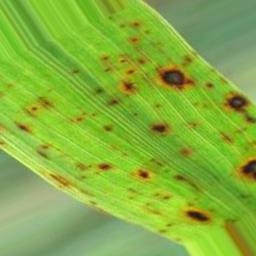

❌ โมเดลตรวจสอบภาพยังไม่ได้ถูกโหลด

ภาพที่อัปโหลดไม่ผ่านเกณฑ์ (ความน่าจะเป็นใช้งานได้: 0.00). กรุณาถ่ายรูปใหม่.


In [ ]:
import ipywidgets as widgets
from IPython.display import display, Image  # Import Image จาก IPython.display
from PIL import Image as PILImage  # เปลี่ยนชื่อ Image ของ PIL เพื่อลดความสับสน
import pandas as pd
import tensorflow as tf

# ลงทะเบียน mse ให้ Keras รู้จัก
# @tf.keras.saving.register_keras_serializable()
def mse(y_true, y_pred):
    return tf.keras.losses.mean_squared_error(y_true, y_pred)

# โหลดโมเดล Filter Model
FILTER_MODEL_PATH = "/content/one_class_autoencoder.h5"
try:
    filter_model = tf.keras.models.load_model(FILTER_MODEL_PATH, custom_objects={'mse': mse})
    print("✅ โหลดโมเดลตรวจสอบภาพสำเร็จ")
except Exception as e:
    print(f"❌ ไม่สามารถโหลดโมเดลตรวจสอบภาพ: {e}")
    filter_model = None


# โหลดข้อมูลคำแนะนำจากไฟล์ CSV
df = pd.read_csv(CSV_PATH)

# --- 5.1 อัปโหลดภาพ ---
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
display(upload_widget)

# Global variable สำหรับเก็บผลลัพธ์จากการวิเคราะห์
predictions = {}
filtered_diseases = {}

def handle_upload(change):
    if upload_widget.value:
        # บันทึกภาพที่อัปโหลด
        for filename, file_info in upload_widget.value.items():
            with open(UPLOADED_IMAGE_PATH, 'wb') as f:
                f.write(file_info['content'])
            print(f"Uploaded image saved as '{UPLOADED_IMAGE_PATH}'")

            # ใช้ IPython.display.Image เพื่อแสดงภาพ
            display(Image(data=file_info['content']))

            # --- ตรวจสอบคุณภาพภาพด้วย Filter Model ---
            usable, prob = is_image_usable(UPLOADED_IMAGE_PATH)
            if not usable:
                print(f"\nภาพที่อัปโหลดไม่ผ่านเกณฑ์ (ความน่าจะเป็นใช้งานได้: {prob:.2f}). กรุณาถ่ายรูปใหม่.")
            else:
                print(f"\nภาพที่อัปโหลดผ่านเกณฑ์ (ความน่าจะเป็นใช้งานได้: {prob:.2f}).")

                # --- รัน Classification Model ---
                global predictions, filtered_diseases
                predictions = run_classification_model(UPLOADED_IMAGE_PATH)
                print("\n🔍 ผลการวิเคราะห์จากโมเดล:")
                for disease, conf in predictions.items():
                    print(f"{disease}: {conf*100:.2f}%")

                # คัดกรองโรคที่มี confidence > 0.5
                filtered_diseases = {d: conf for d, conf in predictions.items() if conf > 0.5}
                print("\nโรคที่มี confidence > 0.5:")
                for disease in filtered_diseases:
                    print(disease)

                # อัปเดตตัวเลือกใน widget สำหรับดูข้อมูลรายละเอียดและ Report
                update_disease_options()

upload_widget.observe(handle_upload, names='value')

# --- 5.2 Widget สำหรับเลือกโรคเพื่อดูรายละเอียดเพิ่มเติม ---
disease_select = widgets.SelectMultiple(
    options=[],  # จะอัปเดตหลังจากได้ผลลัพธ์จากโมเดล
    description='เลือกโรคสำหรับข้อมูลเพิ่มเติม:',
    style={'description_width': 'initial'},
    rows=4
)
display(disease_select)

def update_disease_options():
    if filtered_diseases:
        options = list(filtered_diseases.keys())
        disease_select.options = options
        pdf_disease_select.options = options

# ปุ่มแสดงข้อมูลรายละเอียด
detailed_info_button = widgets.Button(
    description="แสดงข้อมูลรายละเอียดสำหรับโรคที่เลือก",
    button_style='info'
)
def show_detailed_info(b):
    selected = list(disease_select.value)
    if not selected:
        print("กรุณาเลือกโรคที่ต้องการดูข้อมูลเพิ่มเติม")
        return
    for disease in selected:
        row = df[df['Disease'] == disease]
        if not row.empty:
            row = row.iloc[0]
            print("\n--------------------------------")
            print(f"ข้อมูลสำหรับโรค: {disease}")
            print(f"Cause: {row['Cause']}")
            print(f"Symptom: {row['Symptom']}")
            print(f"Prevention: {row['Prevention']}")
            print(f"Control: {row['Control']}")
            print(f"Recovery: {row['Recovery']}")
            print(f"Solution: {row['Solution']}")
            print(f"ค้นหาข้อมูลเพิ่มเติม: https://www.google.com/search?q={disease.replace(' ', '+')}")
        else:
            print(f"ไม่พบข้อมูลสำหรับโรค: {disease}")

detailed_info_button.on_click(show_detailed_info)
display(detailed_info_button)

# --- 5.3 Widget สำหรับเลือกโรคที่ต้องการสร้าง Report PDF ---
pdf_disease_select = widgets.SelectMultiple(
    options=[],  # จะอัปเดตหลังจากได้ผลลัพธ์จากโมเดล
    description='เลือกโรคสำหรับ Report:',
    style={'description_width': 'initial'},
    rows=4
)
display(pdf_disease_select)

# ปุ่มสำหรับสร้าง Report PDF
pdf_button = widgets.Button(
    description="สร้างรายงาน PDF",
    button_style='success'
)
def generate_report(b):
    selected_diseases = list(pdf_disease_select.value)
    if not selected_diseases:
        print("กรุณาเลือกโรคที่ต้องการสร้างรายงาน")
        return
    generate_pdf_report(selected_diseases, predictions, df, UPLOADED_IMAGE_PATH)

pdf_button.on_click(generate_report)
display(pdf_button)


In [ ]:
# pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
import tensorflow as tf

# โหลดโมเดล Filter Model
FILTER_MODEL_PATH = "/content/drive/MyDrive/Colab Notebooks/rice-disease-dignosis/model/filter_model.h5"
try:
    filter_model = tf.keras.models.load_model(
        FILTER_MODEL_PATH,
        custom_objects={'mse': tf.keras.losses.mean_squared_error}
    )
    print("✅ โหลดโมเดลตรวจสอบภาพสำเร็จ")
except Exception as e:
    print(f"❌ ไม่สามารถโหลดโมเดลตรวจสอบภาพ: {e}")
    filter_model = None

❌ ไม่สามารถโหลดโมเดลตรวจสอบภาพ: module 'keras._tf_keras.keras.losses' has no attribute 'mean_squared_error'


❌ ไม่สามารถโหลดโมเดลตรวจสอบภาพ: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}


FileUpload(value={}, accept='image/*', description='Upload')

SelectMultiple(description='เลือกโรคสำหรับข้อมูลเพิ่มเติม:', options=(), rows=4, style=DescriptionStyle(descri…

Button(button_style='info', description='🔎 แสดงข้อมูลโรค', style=ButtonStyle())

SelectMultiple(description='เลือกโรคสำหรับ Report:', options=(), rows=4, style=DescriptionStyle(description_wi…

Button(button_style='success', description='📄 สร้างรายงาน PDF', style=ButtonStyle())

📸 Uploaded image saved as 'uploaded_image.png'


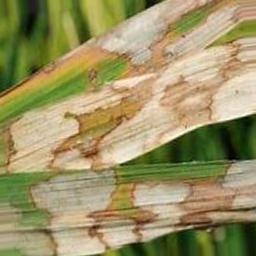

❌ โมเดลตรวจสอบภาพยังไม่ได้ถูกโหลด

⚠️ ภาพไม่ผ่านเกณฑ์ (ความน่าจะเป็นใช้งานได้: 0.00). กรุณาถ่ายรูปใหม่.


In [ ]:
import ipywidgets as widgets
from IPython.display import display, Image  # ใช้สำหรับแสดงภาพ
from PIL import Image as PILImage  # ใช้สำหรับประมวลผลภาพ
import numpy as np
import pandas as pd
import tensorflow as tf  # ใช้สำหรับโหลดโมเดล Keras

# โหลดโมเดล Filter Model
FILTER_MODEL_PATH = "/content/drive/MyDrive/Colab Notebooks/rice-disease-dignosis/model/filter_model.h5"  # เปลี่ยนเป็น path จริงของโมเดล
try:
    filter_model = tf.keras.models.load_model(FILTER_MODEL_PATH)
    print("✅ โหลดโมเดลตรวจสอบภาพสำเร็จ")
except Exception as e:
    print(f"❌ ไม่สามารถโหลดโมเดลตรวจสอบภาพ: {e}")
    filter_model = None

# โหลดข้อมูลคำแนะนำจากไฟล์ CSV
CSV_PATH = "/content/drive/MyDrive/Colab Notebooks/rice-disease-dignosis/disease_info.csv"  # เปลี่ยนเป็น path จริงของไฟล์ CSV
UPLOADED_IMAGE_PATH = "uploaded_image.png"
df = pd.read_csv(CSV_PATH)

# --- 5.1 อัปโหลดภาพ ---
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
display(upload_widget)

# Global variable สำหรับเก็บผลลัพธ์จากการวิเคราะห์
predictions = {}
filtered_diseases = {}

def is_image_usable(image_path, threshold=0.5):
    """ ตรวจสอบคุณภาพของภาพด้วยโมเดล """
    if filter_model is None:
        print("❌ โมเดลตรวจสอบภาพยังไม่ได้ถูกโหลด")
        return False, 0.0

    img = PILImage.open(image_path).convert("RGB")
    img = img.resize((224, 224))  # ปรับขนาด
    img_array = np.array(img) / 255.0  # Normalization

    # ทำนายผลด้วย filter model
    prob = filter_model.predict(np.expand_dims(img_array, axis=0))[0][0]
    return prob > threshold, prob

def handle_upload(change):
    if upload_widget.value:
        for filename, file_info in upload_widget.value.items():
            with open(UPLOADED_IMAGE_PATH, 'wb') as f:
                f.write(file_info['content'])
            print(f"📸 Uploaded image saved as '{UPLOADED_IMAGE_PATH}'")

            # แสดงภาพ
            display(Image(data=file_info['content']))

            # --- ตรวจสอบคุณภาพภาพด้วย Filter Model ---
            usable, prob = is_image_usable(UPLOADED_IMAGE_PATH)
            if not usable:
                print(f"\n⚠️ ภาพไม่ผ่านเกณฑ์ (ความน่าจะเป็นใช้งานได้: {prob:.2f}). กรุณาถ่ายรูปใหม่.")
            else:
                print(f"\n✅ ภาพผ่านเกณฑ์ (ความน่าจะเป็นใช้งานได้: {prob:.2f}).")

                # --- รัน Classification Model ---
                global predictions, filtered_diseases
                predictions = run_classification_model(UPLOADED_IMAGE_PATH)
                print("\n🔍 ผลการวิเคราะห์จากโมเดล:")
                for disease, conf in predictions.items():
                    print(f"{disease}: {conf*100:.2f}%")

                # คัดกรองโรคที่มี confidence > 0.5
                filtered_diseases = {d: conf for d, conf in predictions.items() if conf > 0.01}
                print("\n✅ โรคที่มี confidence > 0.01:")
                for disease in filtered_diseases:
                    print(f"- {disease}")

                # อัปเดตตัวเลือกใน widget
                update_disease_options()

upload_widget.observe(handle_upload, names='value')

# --- 5.2 Widget สำหรับเลือกโรคเพื่อดูรายละเอียดเพิ่มเติม ---
disease_select = widgets.SelectMultiple(
    options=[], description='เลือกโรคสำหรับข้อมูลเพิ่มเติม:',
    style={'description_width': 'initial'}, rows=4
)
display(disease_select)

def update_disease_options():
    """ อัปเดตตัวเลือกโรคใน widget """
    if filtered_diseases:
        options = list(filtered_diseases.keys())
        disease_select.options = options
        pdf_disease_select.options = options

# ปุ่มแสดงข้อมูลรายละเอียด
detailed_info_button = widgets.Button(
    description="🔎 แสดงข้อมูลโรค", button_style='info'
)

def show_detailed_info(b):
    selected = list(disease_select.value)
    if not selected:
        print("⚠️ กรุณาเลือกโรคที่ต้องการดูข้อมูลเพิ่มเติม")
        return
    for disease in selected:
        row = df[df['Disease'] == disease]
        if not row.empty:
            row = row.iloc[0]
            print("\n--------------------------------")
            print(f"🦠 ข้อมูลสำหรับโรค: {disease}")
            print(f"📌 สาเหตุ: {row['Cause']}")
            print(f"⚠️ อาการ: {row['Symptom']}")
            print(f"🛑 การป้องกัน: {row['Prevention']}")
            print(f"🩺 การควบคุม: {row['Control']}")
            print(f"💊 การฟื้นฟู: {row['Recovery']}")
            print(f"✅ วิธีแก้ไข: {row['Solution']}")
            print(f"🔎 ค้นหาข้อมูลเพิ่มเติม: https://www.google.com/search?q={disease.replace(' ', '+')}")
        else:
            print(f"❌ ไม่พบข้อมูลสำหรับโรค: {disease}")

detailed_info_button.on_click(show_detailed_info)
display(detailed_info_button)

# --- 5.3 Widget สำหรับเลือกโรคที่ต้องการสร้าง Report PDF ---
pdf_disease_select = widgets.SelectMultiple(
    options=[], description='เลือกโรคสำหรับ Report:',
    style={'description_width': 'initial'}, rows=4
)
display(pdf_disease_select)

# ปุ่มสำหรับสร้าง Report PDF
pdf_button = widgets.Button(
    description="📄 สร้างรายงาน PDF", button_style='success'
)

def generate_report(b):
    selected_diseases = list(pdf_disease_select.value)
    if not selected_diseases:
        print("⚠️ กรุณาเลือกโรคที่ต้องการสร้างรายงาน")
        return
    generate_pdf_report(selected_diseases, predictions, df, UPLOADED_IMAGE_PATH)

pdf_button.on_click(generate_report)
display(pdf_button)